In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
movies = pd.read_csv("/content/drive/My Drive/Data Scientist/movielens/movies.csv")
tags = pd.read_csv("/content/drive/My Drive/Data Scientist/movielens/tags.csv")
url = "https://raw.githubusercontent.com/srviest/movie-recommender/master/dataset/movielens/small/ratings.csv"
ratings = pd.read_csv(url)
tags.shape

(465564, 4)

In [ ]:
del tags['timestamp']
del ratings['timestamp']

In [ ]:
# Operamos con Series
row_0 = tags.iloc[0]
type(row_0)
row_0
'rating' in row_0

False

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
tags.iloc[[0,21,2005]]

,userId,movieId,tag
0,18,4141,Mark Waters
21,65,6874,dark hero
2005,910,97938,stranded


In [ ]:
#Analizar los datos
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
ratings['rating'].mean()

3.543608255669773

In [ ]:
ratings.mean()

userId       347.011310
movieId    12548.664363
rating         3.543608
dtype: float64

In [ ]:
ratings['rating'].min()

0.5

In [ ]:
ratings['rating'].max()

5.0

In [ ]:
#desviacion
ratings['rating'].std()

1.0580641091073735

In [ ]:
#Moda
ratings['rating'].mode()

0    4.0
dtype: float64

In [ ]:
#correlacion
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.007126,0.010467
movieId,0.007126,1.000000,-0.028894
rating,0.010467,-0.028894,1.000000


In [ ]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
          ...  
99999     False
100000    False
100001    False
100002    False
100003    False
Name: rating, Length: 100004, dtype: bool


False

In [ ]:
#Data cleaning
movies.shape

(27278, 3)

In [ ]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Buscar valores nulos
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [ ]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [ ]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [ ]:
count = tags.shape[0]
count

465564

In [ ]:
# eliminar nulos
tags = tags.dropna()
tags.shape[0]

465548

In [ ]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fced0e32eb8>]],
      dtype=object)

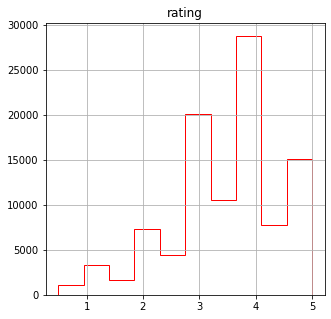

In [ ]:
# Graficas Pandas
ratings.hist(bins=10,column='rating',figsize=(5,5), histtype = 'step', color= 'red')

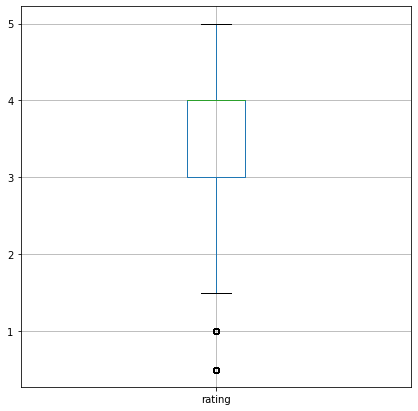

In [ ]:
ratings.boxplot(column ='rating',figsize=(7,7))

In [ ]:
movies_count = movies['genres'].value_counts()
movies_count

Drama                                              4520
Comedy                                             2294
Documentary                                        1942
Comedy|Drama                                       1264
Drama|Romance                                      1075
                                                   ... 
Comedy|Crime|Film-Noir|Mystery|Romance|Thriller       1
Horror|Musical|Thriller                               1
Adventure|Mystery|Western                             1
Animation|Comedy|Horror                               1
Action|Adventure|Crime|Romance|Western                1
Name: genres, Length: 1342, dtype: int64

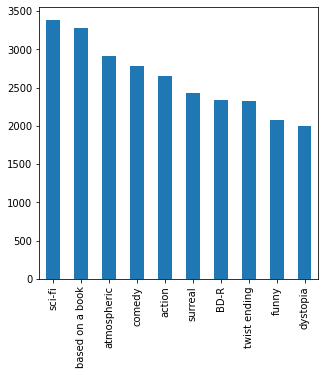

In [ ]:
tags.head(5)
tags_counts = tags['tag'].value_counts()
tags_counts[:10].plot(kind='bar',figsize=(5,5))

In [ ]:
filtro_mejores = ratings['rating'] >= 4.0
ratings[filtro_mejores][::]

,userId,movieId,rating
4,1,1172,4.0
12,1,1953,4.0
13,1,2105,4.0
20,2,10,4.0
21,2,17,5.0
...,...,...,...
99995,671,5989,4.0
99996,671,5991,4.5
99997,671,5995,4.0
100000,671,6269,4.0


In [ ]:
filtro_animado = movies['genres'].str.contains('Animation')
Animados = movies[filtro_animado]
Animados.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [ ]:
#Agrupar por y agregar
ratings_count = ratings[['movieId','rating']].groupby('rating').count()


In [ ]:
#MEdia
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [ ]:
#unir
tags.head()
full = movies.merge(tags,on ='movieId', how='inner')
full2 = movies.merge(tags, on = 'movieId',how = 'left')
c = full.shape[0]
d = full2.shape[0]
missed = d-c
missed

7733

In [ ]:
# Unimos agregamos y aplicamos filtros
avg_ratings = ratings.groupby('movieId').mean()
del avg_ratings['userId']
avg_ratings

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [ ]:
taquilla = movies.merge(avg_ratings,on= 'movieId',how='inner')
taquilla.shape


(8794, 4)

In [ ]:
las_mejores_filtro = taquilla['rating'] >4.0
las_mejores = taquilla[las_mejores_filtro]
las_mejores

,movieId,title,genres,rating
25,26,Othello (1995),Drama,4.100000
27,28,Persuasion (1995),Drama|Romance,4.083333
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,4.025000
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,4.050000
39,41,Richard III (1995),Drama|War,4.021739
...,...,...,...,...
8769,129313,Reality (2014),Comedy,5.000000
8772,129514,George Carlin: It's Bad for Ya! (2008),Comedy,5.000000
8784,130522,The Brave Little Toaster Goes to Mars (1998),Animation|Children,5.000000
8790,130970,George Carlin: Life Is Worth Losing (2005),Comedy,5.000000


In [ ]:
Filtro_comedia = las_mejores['genres'].str.contains('Comedy')
las_mejores[Filtro_comedia].head(5)

,movieId,title,genres,rating
150,171,Jeffrey (1995),Comedy|Drama,4.333333
157,178,Love & Human Remains (1993),Comedy|Drama,4.700000
161,183,Mute Witness (1994),Comedy|Horror|Thriller,5.000000
171,194,Smoke (1995),Comedy|Drama,4.291667
204,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.208333


In [ ]:
#Operaciones
generos = movies['genres'].str.split('|',expand = True)
generos['es comedia'] = movies['genres'].str.contains('Comedy')
generos.head(5)


,0,1,2,3,4,5,6,7,8,9,es comedia
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


In [ ]:
movies.head(5)
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*', expand = True)
movies.head(5)

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
#Parsendo timesstaps
tags = pd.read_csv('/content/drive/My Drive/Data Scientist/movielens/tags.csv')
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'],unit='s')
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


In [ ]:
mayores_que = tags['parsed_time'] > '2015-02-01'
selected_row = tags[mayores_que]
tags.shape, selected_row.shape

((465564, 5), (12130, 5))

In [ ]:
tags.sort_values(by=['parsed_time'], ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


In [ ]:
#Calificaciones promedio a lo largo del tiempo
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index = False).mean()
average_rating.tail()

,movieId,rating
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0
9065,163949,5.0


In [ ]:
joined = movies.merge(average_rating, on='movieId',how='inner')
joined.head()
generos = joined['genres'].str.split('|', expand= True)
joined.head(5)

,movieId,title,genres,Year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857


In [ ]:
z = lambda x: x**2
z

<function __main__.<lambda>>

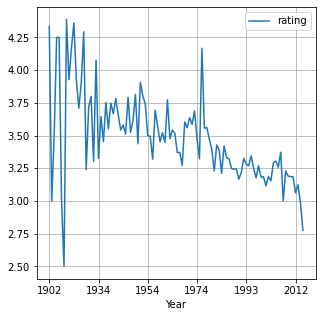

In [ ]:
media_anual = joined[['Year','rating']].groupby('Year', as_index=False).mean()
media_anual[::].plot(x='Year',y='rating',figsize=(5,5), grid=True)